<a href="https://colab.research.google.com/github/DataScience-RajKapoor/ds_422/blob/master/MSDS422_Assignment1_KapoorRaj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1 - Raj Kapoor

### Installation and Importing libaries/modules

**Installed Pandas, numpy, matplotlib, seaborn  through** `pip3 install pandas numpy matplotlib seaborn`

In [0]:
import pandas as pd  # data frame operations  
import numpy as np  # arrays and math functions
import matplotlib.pyplot as plt  # static plotting
import seaborn as sns  # pretty plotting, including heat map

  Function to produce a heat map using seaborn

read in comma-delimited text file , creating a pandas DataFrame object
note that IPAddress is formatted as an actual IP address but is a hash of original ip-address

uploaded `mspa-survey-data.csv` file to Google Drive

### Correlation Heatmap setup for seaborn

In [0]:
def corr_chart(df_corr):
  corr = df_corr.corr()
  # screen top half to get a triange
  top = np.zeros_like(corr,dtype = np.bool)
  top[np.triu_indices_from(top)] = True
  fig = plt.figure()
  fig,ax = plt.subplots(figsize=(12,12))
  sns.heatmap(corr,
             mask = top,
             cmap = 'coolwarm',
             center = 0,
             square = True,
             linewidths = 0.5,
             cbar_kws = {'shrink':.5},
             annot = True,
             annot_kws = {'size':9},
             fmt = '.3f')
  plt.xticks(rotation = 45) # rotate variable labels on columns (x-axis)
  plt.yticks(rotation = 0)  # use horizontal variable labels on rows (y-axis)
  plt.title('Correlation Heat Map')
  plt.savefig('plot-corr-map.pdf',
             bbox_inches = 'tight',
             dpi = None,
             facecolor = 'w',
             edgecolor = 'b',
             orientation = 'portrait',
             papertype = None,
             format = None,
             transparent = True,
             pad_inches = 0.25,
             frameon = None)
  
  np.set_printoptions(precision = 3)

### Access the uploaded csv file from Google Drive to Colabatory (this is useful)

In [0]:
!pip install -U -q Pydrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

1. Authenticate and create the PyDrive client.

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

Get the file 

In [0]:
downloaded = drive.CreateFile({'id':'1_EgHY7rC3eJzAZE3sY_chFwLdmtUsVve'})
downloaded.GetContentFile('mspa_content.csv')

Import the file in a panda dataframe

In [0]:
import pandas as pd
valid_survey_input = pd.read_csv('mspa_content.csv')

### Check the Data Frame content and assign and index to it

In [11]:
print(valid_survey_input.head())

   RespondentID  Personal_JavaScalaSpark  Personal_JavaScriptHTMLCSS  \
0    5135740122                        0                           0   
1    5133300037                       10                          10   
2    5132253300                       20                           0   
3    5132096630                       10                          10   
4    5131990362                       20                           0   

   Personal_Python  Personal_R  Personal_SAS  Professional_JavaScalaSpark  \
0                0          50            50                            0   
1               50          30             0                           25   
2               40          40             0                            0   
3               25          35            20                           10   
4                0          70            10                           20   

   Professional_JavaScriptHTMLCSS  Professional_Python  Professional_R  \
0                             

use the RespondentID as lable for the rows - the index of DataFrame

In [0]:
valid_survey_input.set_index('RespondentID',drop = True,inplace = True)

#### Examine the structure of of the Dataframe object

In [13]:
print('\nContents of initial survey data-------------')
print('\nNumber of Respondents = ',len(valid_survey_input))


Contents of initial survey data-------------

Number of Respondents =  207


Show the column/variable names of the DataFrame
RespondentID is no longer present - as we used `drop = True` option in set_index

In [14]:
print(valid_survey_input.columns)

Index(['Personal_JavaScalaSpark', 'Personal_JavaScriptHTMLCSS',
       'Personal_Python', 'Personal_R', 'Personal_SAS',
       'Professional_JavaScalaSpark', 'Professional_JavaScriptHTMLCSS',
       'Professional_Python', 'Professional_R', 'Professional_SAS',
       'Industry_JavaScalaSpark', 'Industry_JavaScriptHTMLCSS',
       'Industry_Python', 'Industry_R', 'Industry_SAS',
       'Python_Course_Interest', 'Foundations_DE_Course_Interest',
       'Analytics_App_Course_Interest', 'Systems_Analysis_Course_Interest',
       'Courses_Completed', 'PREDICT400', 'PREDICT401', 'PREDICT410',
       'PREDICT411', 'PREDICT413', 'PREDICT420', 'PREDICT422', 'PREDICT450',
       'PREDICT451', 'PREDICT452', 'PREDICT453', 'PREDICT454', 'PREDICT455',
       'PREDICT456', 'PREDICT457', 'OtherPython', 'OtherR', 'OtherSAS',
       'Other', 'Graduate_Date'],
      dtype='object')


abbreviated printing of the first five rows of the data frame

In [15]:
print(valid_survey_input.head())

              Personal_JavaScalaSpark  Personal_JavaScriptHTMLCSS  \
RespondentID                                                        
5135740122                          0                           0   
5133300037                         10                          10   
5132253300                         20                           0   
5132096630                         10                          10   
5131990362                         20                           0   

              Personal_Python  Personal_R  Personal_SAS  \
RespondentID                                              
5135740122                  0          50            50   
5133300037                 50          30             0   
5132253300                 40          40             0   
5132096630                 25          35            20   
5131990362                  0          70            10   

              Professional_JavaScalaSpark  Professional_JavaScriptHTMLCSS  \
RespondentID             

Shorten the variable/column names for software preferences variable

In [0]:
survey_df = valid_survey_input.rename(index = str , columns = {
    'Personal_JavaScalaSpark': 'My_Java',
    'Personal_JavaScriptHTMLCSS': 'My_JS',
    'Personal_Python': 'My_Python',
    'Personal_R': 'My_R',
    'Personal_SAS': 'My_SAS',
    'Professional_JavaScalaSpark': 'Prof_Java',
    'Professional_JavaScriptHTMLCSS': 'Prof_JS',
    'Professional_Python': 'Prof_Python',
    'Professional_R': 'Prof_R',
    'Professional_SAS': 'Prof_SAS',
    'Industry_JavaScalaSpark': 'Ind_Java',
    'Industry_JavaScriptHTMLCSS': 'Ind_JS',
    'Industry_Python': 'Ind_Python',
    'Industry_R': 'Ind_R',
    'Industry_SAS': 'Ind_SAS'})

Define subset DataFrame for analysis of software preferences

In [0]:
software_df = survey_df.loc[:,'My_Java':'Ind_SAS']

In [18]:
print(software_df)

              My_Java  My_JS  My_Python  My_R  My_SAS  Prof_Java  Prof_JS  \
RespondentID                                                                
5135740122          0      0          0    50      50          0        0   
5133300037         10     10         50    30       0         25       25   
5132253300         20      0         40    40       0          0        0   
5132096630         10     10         25    35      20         10       10   
5131990362         20      0          0    70      10         20        0   
5131860849         25     15         30    30       0         10       30   
5131698528         20      0         40    30      10         70        0   
5130809490          0      0         40    40      20         20       20   
5130188921         30     15         20    20      15         30       20   
5129721525          0      0         50    50       0          0        0   
5129569679          5     15         35    35      10          0        5   

### Visualizations



#### Single scatter plot example

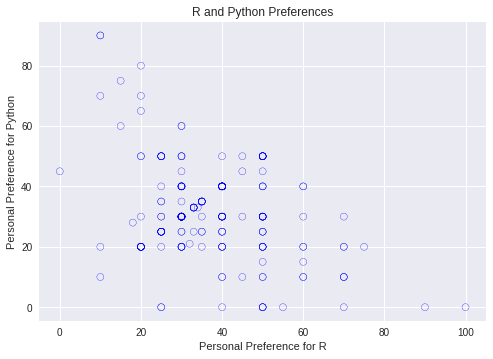

In [19]:
fig,axis = plt.subplots()
axis.set_xlabel('Personal Preference for R')
axis.set_ylabel('Personal Preference for Python')
plt.title('R and Python Preferences')
scatter_plot = axis.scatter(survey_df['My_R'],survey_df['My_Python'],
                                              facecolors = 'none',
                                              edgecolors = 'blue')

In [20]:
plt.savefig('plot-scatter-r-python.pdf',
           bbox_inches = 'tight',
           dpi = None,
           facecolor = 'w',
           edgecolor = 'b',
           orienttion = 'portrait',
           papertype = None,
            format = None,
            transparent = True,
            pad_inches = 0.25,
            frameon = None)
            
  

In [0]:
survey_df_1_labels = [
    'Personal Preference for Java/Scala/Spark',
    'Personal Preference for Java/Script/HTML/CSS',
    'Personal Preference for Python',
    'Personal Preference for R',
    'Personal Preference for SAS',
    'Professional Java/Scala/Spark',
    'Professional JavaScript/HTML/CSS',
    'Professional Python',
    'Professional R',
    'Professional SAS',
    'Industry Java/Scala/Spark',
    'Industry Java/Script/HTML/CSS',
    'Industry Python',
    'Industry R',
    'Industry SAS'        
]    

In [0]:
survey_df_labels = [
    'Personal Preference for Java/Scala/Spark',
    'Professional Java/Scala/Spark',
    'Industry Java/Scala/Spark',
    'Personal Preference for Java/Script/HTML/CSS',
    'Professional JavaScript/HTML/CSS',
    'Industry Java/Script/HTML/CSS',
    'Personal Preference for Python',
    'Professional Python',
    'Industry Python',
    'Industry Java/Script/HTML/CSS',
    'Personal Preference for R',
    'Professional R',
    'Industry R',
    'Personal Preference for SAS', 
    'Professional SAS',
    'Industry SAS'       
]    

#### Set of scatter plots for personal preferences 

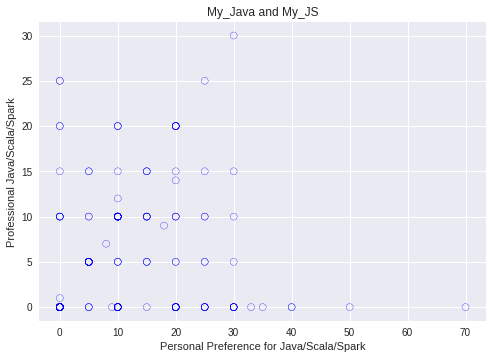

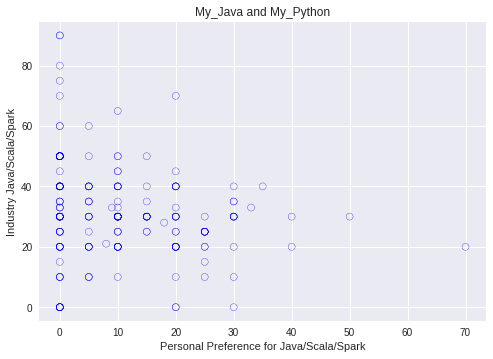

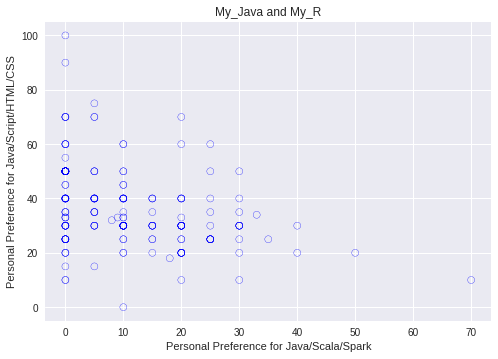

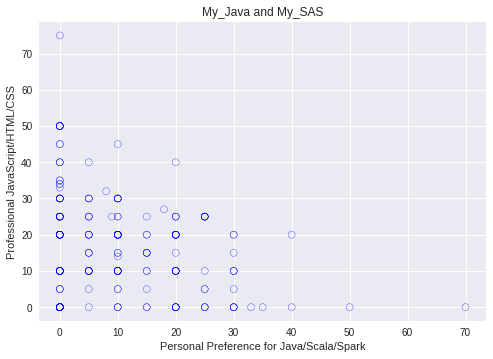

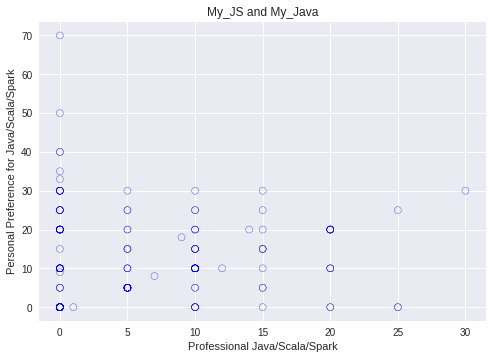

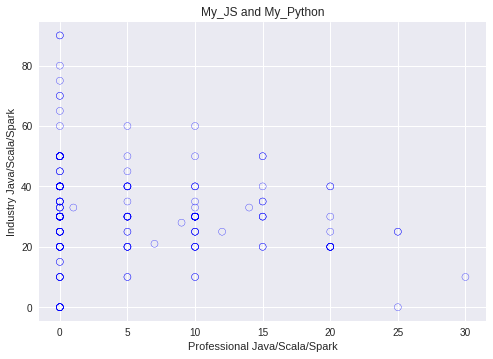

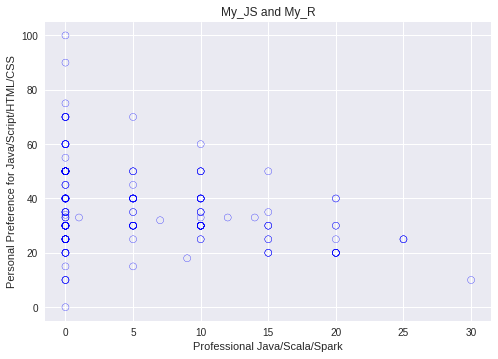

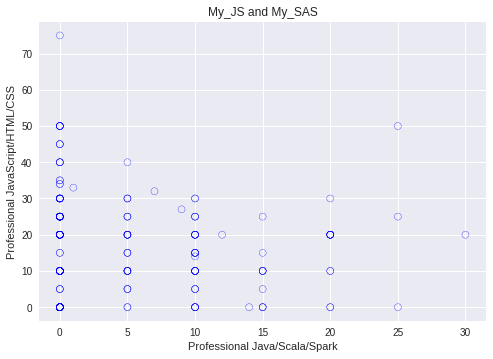

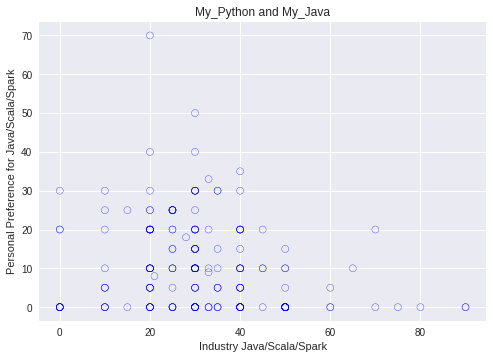

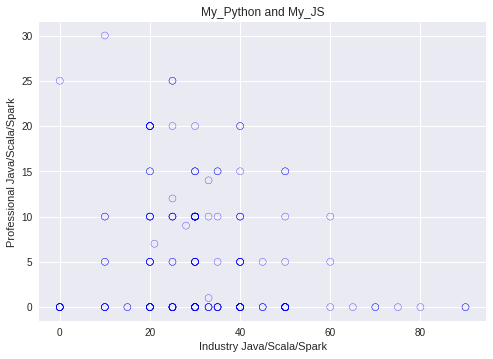

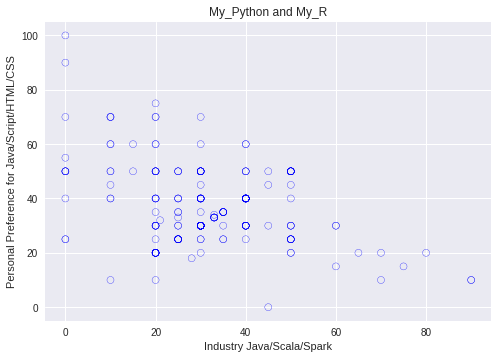

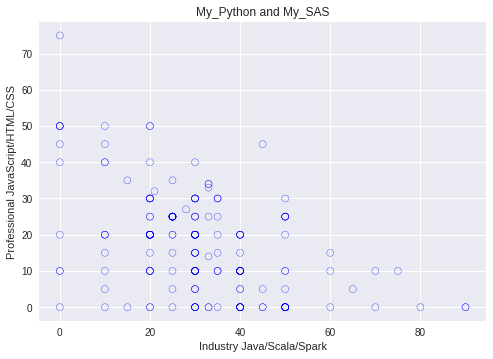

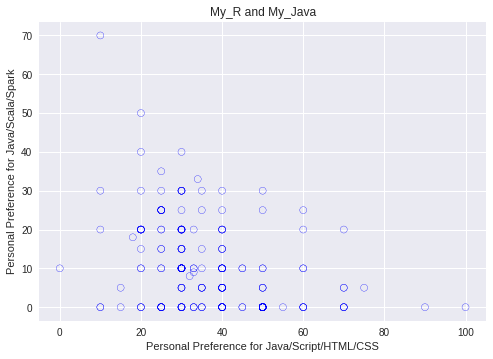

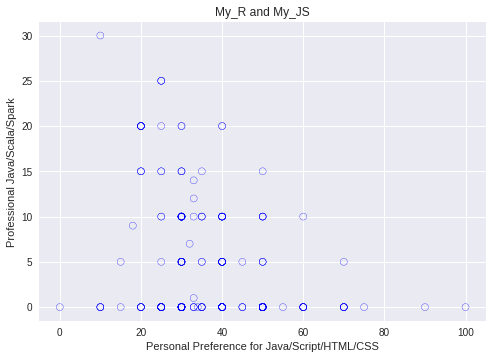

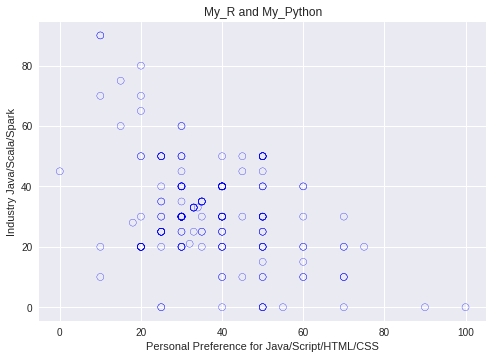

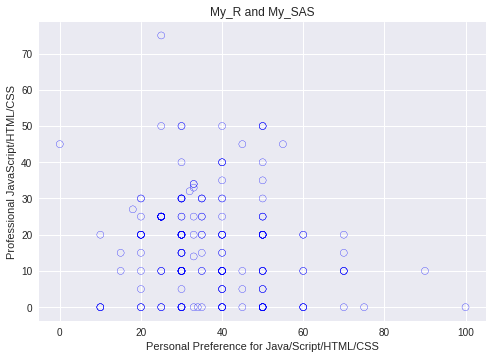

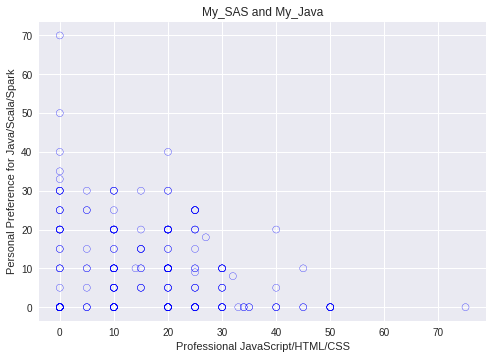

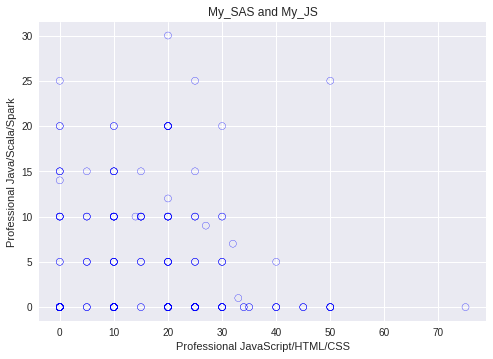

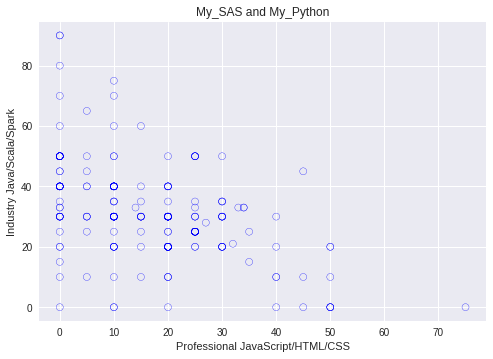

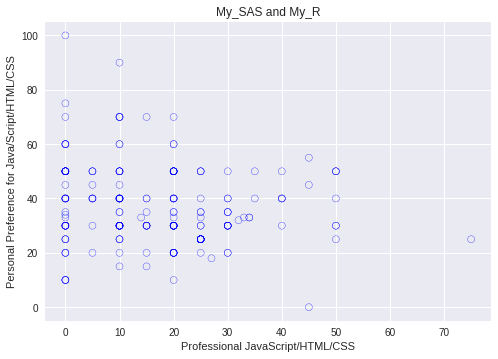

In [33]:
for i in range(5):
  for j in range(5):
    if i != j:
      file_title = survey_df.columns[i] + '_and_' + survey_df.columns[j]
      plot_title = survey_df.columns[i] + ' and ' + survey_df.columns[j]
      fig,axis = plt.subplots()
      axis.set_xlabel(survey_df_labels[i])
      axis.set_ylabel(survey_df_labels[j])
      plt.title(plot_title)
      scatter_plot = axis.scatter(survey_df[survey_df.columns[i]],
                                  survey_df[survey_df.columns[j]],
                                            facecolors = 'none',
                                            edgecolors = 'blue')
      plt.savefig(file_title + '.pdf',
                  bbox_inces = 'tight',
                  dpi = None,
                  facecolor = 'w',
                  edgecolor = 'b',
                  orientation = 'portrait',
                  papertype = None,
                  format = None,
                  transparent = True,
                  pad_inches = 0.25,
                  frameon = None)
                                      

### Examine Inter-Correlations among software preference variables

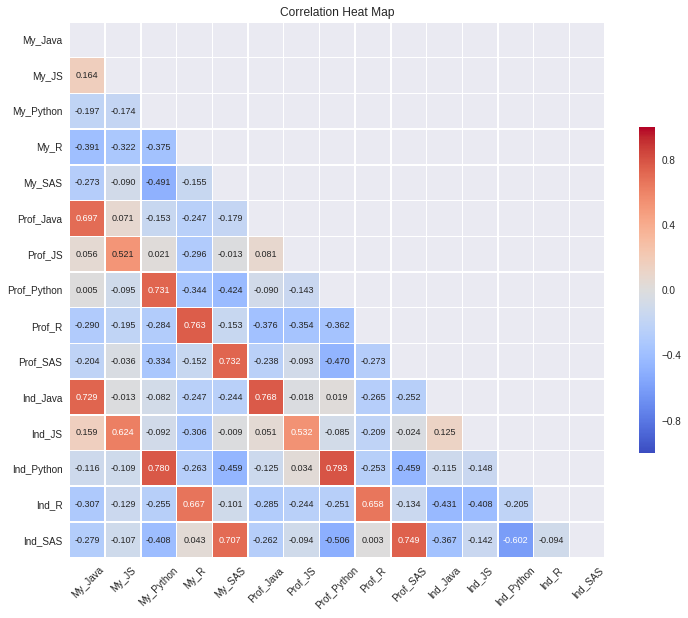

In [23]:
corr_chart(df_corr = software_df)

### Description Statististics for software preference variables

In [24]:
print('\nDescriptive statistics for survey data')
print(survey_df['Courses_Completed'].describe())


Descriptive statistics for survey data
count    187.000000
mean       6.342246
std        3.170849
min        1.000000
25%        4.000000
50%        6.000000
75%        9.000000
max       12.000000
Name: Courses_Completed, dtype: float64



####  --------------------------
#### Transformation code added with version v005
####  --------------------------

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#### Select the variable to examine 

In [0]:
X = survey_df['Courses_Completed'].dropna().values.reshape(-1,1)
#X = X_n.values.reshape(-1,1)

In [0]:
print(X)

### Plot Distribution of Courses Completed

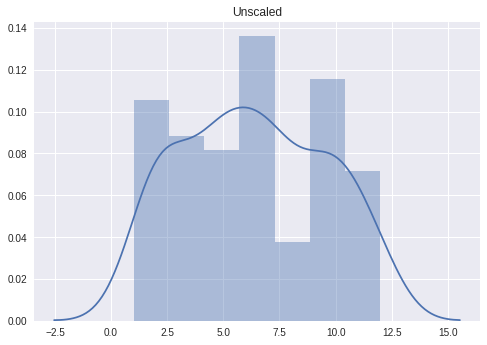

In [28]:
unscaled_fig,x = plt.subplots()
sns.distplot(X).set_title('Unscaled')
unscaled_fig.savefig('Transformation-Unscaled'+'.pdf',
                    bbox_inches = 'tight',
                    dpi = None,
                    facecolor = 'w',
                    edgecolor = 'b',
                    orienttion = 'portrait',
                    papertype = None,
                    format = None,
                    transparent = True,
                    pad_inches = 0.25,
                    frameon = None)

#### Standardized scaler

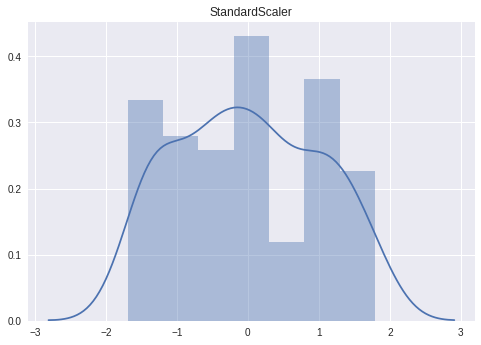

In [29]:
standard_fig,ax = plt.subplots()
sns.distplot(StandardScaler().fit_transform(X)).set_title('StandardScaler')
standard_fig.savefig('Transformation-StandardScaler'+'.pdf',
                    bbox_inches = 'tight',
                    dpi = None,
                    facecolor = 'w',
                    edgecolor = 'b',
                    orienttion = 'portrait',
                    papertype = None,
                    format = None,
                    transparent = True,
                    pad_inches = 0.25,
                    frameon = None)

Text(0.5,1,'MinMaxScaler')

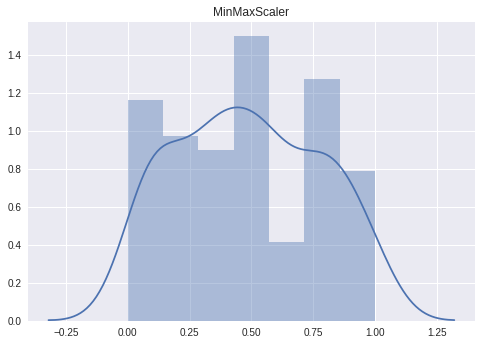

In [30]:
minxmax_fig,ax = plt.subplots()
sns.distplot(MinMaxScaler().fit_transform(X)).set_title('MinMaxScaler')

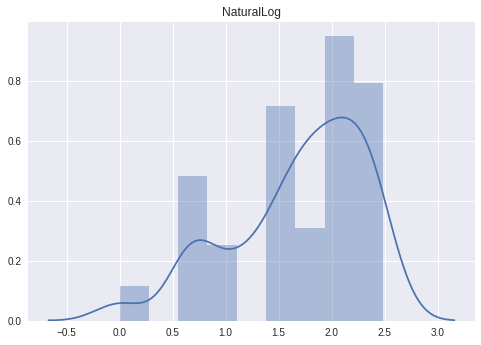

In [31]:
log_fig, ax = plt.subplots()
sns.distplot(np.log(X)).set_title('NaturalLog')
log_fig.savefig('Transformation-NaturalLog' + '.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None) 